importing dependencies

In [1]:
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import os
from sklearn.utils import shuffle
import tensorflow

from keras.models import Sequential

from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, GlobalAveragePooling2D

from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from IPython import display 
display.set_matplotlib_formats('svg')
import glob as gb

C:\Users\jaimi\AppData\Local\Temp\ipykernel_18828\2568687585.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


Loading the Training, validation and test dataset:

In [2]:
TRAIN_DIR = "C:/Users/jaimi/Downloads/AMLP/satellite-data_splitted/train"
VAL_DIR = "C:/Users/jaimi/Downloads/AMLP/satellite-data_splitted/val"
TEST_DIR = "C:/Users/jaimi/Downloads/AMLP/satellite-data_splitted/test"

Checking and printing details for training, validation and test data

In [3]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.tif'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 280 in folder airplane
For training data, found 542 in folder airport_runway
For training data, found 226 in folder artificial_grassland
For training data, found 435 in folder avenue
For training data, found 691 in folder bare_land
For training data, found 375 in folder bridge
For training data, found 811 in folder city_building
For training data, found 367 in folder coastline
For training data, found 528 in folder container
For training data, found 442 in folder crossroads
For training data, found 259 in folder dam
For training data, found 873 in folder desert
For training data, found 1047 in folder dry_farm
For training data, found 865 in folder forest
For training data, found 515 in folder green_farmland
For training data, found 178 in folder highway
For training data, found 502 in folder hirst
For training data, found 350 in folder lakeshore
For training data, found 839 in folder mangrove
For training data, found 292 in folder marina
For training data, foun

In [4]:
for folder in os.listdir(VAL_DIR):
    files = gb.glob(pathname= str(VAL_DIR+ '/'+ folder + '/*.tif'))
    print(f'For validation data, found {len(files)} in folder {folder}')

For validation data, found 35 in folder airplane
For validation data, found 67 in folder airport_runway
For validation data, found 28 in folder artificial_grassland
For validation data, found 54 in folder avenue
For validation data, found 86 in folder bare_land
For validation data, found 46 in folder bridge
For validation data, found 101 in folder city_building
For validation data, found 45 in folder coastline
For validation data, found 66 in folder container
For validation data, found 55 in folder crossroads
For validation data, found 32 in folder dam
For validation data, found 109 in folder desert
For validation data, found 130 in folder dry_farm
For validation data, found 108 in folder forest
For validation data, found 64 in folder green_farmland
For validation data, found 22 in folder highway
For validation data, found 62 in folder hirst
For validation data, found 43 in folder lakeshore
For validation data, found 104 in folder mangrove
For validation data, found 36 in folder marina

In [5]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.tif'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 36 in folder airplane
For testing data, found 69 in folder airport_runway
For testing data, found 29 in folder artificial_grassland
For testing data, found 55 in folder avenue
For testing data, found 87 in folder bare_land
For testing data, found 48 in folder bridge
For testing data, found 102 in folder city_building
For testing data, found 47 in folder coastline
For testing data, found 66 in folder container
For testing data, found 56 in folder crossroads
For testing data, found 33 in folder dam
For testing data, found 110 in folder desert
For testing data, found 132 in folder dry_farm
For testing data, found 109 in folder forest
For testing data, found 65 in folder green_farmland
For testing data, found 23 in folder highway
For testing data, found 64 in folder hirst
For testing data, found 45 in folder lakeshore
For testing data, found 106 in folder mangrove
For testing data, found 38 in folder marina
For testing data, found 82 in folder mountain
For testing d

Performing Data Augmentation on dataset images

In [6]:
# Data loading 
train_gen = ImageDataGenerator(rotation_range=15, shear_range=10,
                                   zoom_range=0.1, 
                                   height_shift_range=0.05, width_shift_range=0.1) 


train_data = train_gen.flow_from_directory(TRAIN_DIR, target_size = (224, 224), 
                                          batch_size = 16, class_mode = 'categorical', shuffle = True)

val_gen = ImageDataGenerator()                                         
val_data = val_gen.flow_from_directory(VAL_DIR, target_size = (224, 224), 
                                          batch_size = 16, class_mode = 'categorical', shuffle = True)

               

Found 19785 images belonging to 35 classes.
Found 2457 images belonging to 35 classes.


Printing classes of the dataset

In [8]:
import pathlib 
path = TRAIN_DIR
data_dir = pathlib.Path(path)

tags = np.array(sorted([item.name for item in data_dir.glob("*")]))
tags

array(['airplane', 'airport_runway', 'artificial_grassland', 'avenue',
       'bare_land', 'bridge', 'city_building', 'coastline', 'container',
       'crossroads', 'dam', 'desert', 'dry_farm', 'forest',
       'green_farmland', 'highway', 'hirst', 'lakeshore', 'mangrove',
       'marina', 'mountain', 'parkinglot', 'pipeline', 'residents',
       'river', 'river_protection_forest', 'sandbeach', 'sapling', 'sea',
       'shrubwood', 'snow_mountain', 'sparse_forest', 'storage_room',
       'stream', 'town'], dtype='<U23')

importing ResNet101 model from keras

In [9]:
from keras.applications.resnet import ResNet101, preprocess_input

In [10]:
#using ResNet101 model with imagenet weights to train the model faster

model = Sequential()
base_model = ResNet101(input_shape = [224, 224, 3], weights = 'imagenet', include_top = False)

171446536/171446536 [==============================] - 7s 0us/step


In [11]:
base_model.trainable = True  

for i in base_model.layers[:100]: 
    base_model.trainable = False
    
pool = GlobalAveragePooling2D()
mid_layer = Dense(100,activation = 'relu')
final_1 = Dense(35,activation = 'softmax')

model = Sequential([base_model, mid_layer,pool, final_1])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 dense (Dense)               (None, 7, 7, 100)         204900    
                                                                 
 global_average_pooling2d (G  (None, 100)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 35)                3535      
                                                                 
Total params: 42,866,611
Trainable params: 208,435
Non-trainable params: 42,658,176
_________________________________________________________________


Training the model

In [14]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = 'accuracy')
history=model.fit(train_data,validation_data=val_data, epochs = 5,batch_size=64,verbose=1)

Epoch 1/5
1237/1237 [==============================] - 931s 750ms/step - loss: 0.1391 - accuracy: 0.9572 - val_loss: 0.0879 - val_accuracy: 0.9748
Epoch 2/5
1237/1237 [==============================] - 966s 781ms/step - loss: 0.0646 - accuracy: 0.9797 - val_loss: 0.0616 - val_accuracy: 0.9801
Epoch 3/5
1237/1237 [==============================] - 993s 803ms/step - loss: 0.0437 - accuracy: 0.9852 - val_loss: 0.0637 - val_accuracy: 0.9837
Epoch 4/5
1237/1237 [==============================] - 961s 777ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0597 - val_accuracy: 0.9849
Epoch 5/5
1237/1237 [==============================] - 1047s 846ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0450 - val_accuracy: 0.9894


Saving the trained model

In [15]:
model.save("trained_ResNet101.h5")

Plotting model accuracy and loss

Text(0.5, 0, 'epoch')

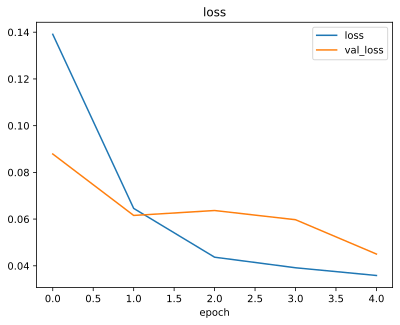

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

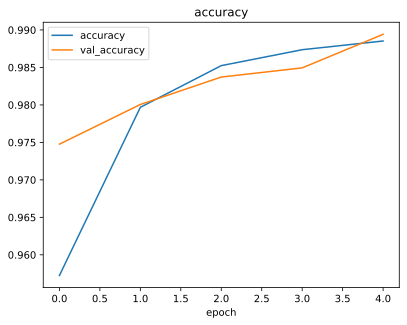

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')